In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

import warnings
warnings.filterwarnings(action='ignore')

os.chdir('C:/Users/cts08/Tobigs19_work/ml-latest-small')

# Data Preprocessing & EDA

In [2]:
movies = pd.read_csv('movies.csv', encoding='utf-8')
ratings = pd.read_csv('ratings.csv', encoding='utf-8')
tags = pd.read_csv('tags.csv', encoding='utf-8')

movie_df = movies.copy()
rating_df = ratings.copy()
tag_df = tags.copy()

### 1. Movie Data

In [3]:
movie_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [5]:
movie_df.shape

(9742, 3)

movie 데이터는 영화 정보가 담겨있는 데이터이며 3개 열과 9742개의 행이 담겨져 있다.
첫째로 movieid는 각 영화의 아이디 번호가 할당되어 있고 두번째는 영화명과 연도, 마지막으로 영화별 장르가 나타나 있다.

### 2. Rating Data

In [6]:
rating_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [8]:
rating_df.shape

(100836, 4)

rating 데이터는 사용자(userid)마다 관람한 영화(movieid)에 대한 평점을 남긴 데이터이다. 4개 열과 100836개의 행이 담겨져 있고 행 정보는 사용자의 id, 영화 id, 해당 사용자가 영화에 매긴 평점, 시간 정보가 담겨져 있다.
(여기서 100836개의 행은 한 사용자가 모든 영화(9742개)를 다 보지는 않았기 때문에 (사용자 수 x 영화 수)만큼의 데이터가 존재하지는 않았다.)

### 3. Tag Data

In [9]:
tag_df.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [10]:
tag_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [11]:
tag_df.shape

(3683, 4)

tag 데이터는 사용자가 영화를 관람한 후 남긴 리뷰로부터 추출한 태그가 저장된 데이터이다. 4개 열과 3683개의 행이 담겨져 있고 행 정보는 사용자의 id, 영화 id, 해당 사용자가 영화에 남긴 태그, 시간 정보가 담겨져 있다.

기본적으로 모든 데이터 셋에 결측치는 존재하지 않는 것으로 확인되었다.

## EDA (1)

movie 데이터에서 영화의 개봉 연도가 나타나 있다. 따라서 10년대별로 연도를 나누어 연도별 영화의 개봉 횟수를 알아보도록 한다.

In [12]:
movie_df['year'] = movie_df['title'].apply(lambda x : x.split()[-1][-5:-1] if x[-1] == ')' else 0)
movie_df['year_term'] = movie_df['title'].apply(lambda x : x.split()[-1][-5:-2] + "0" if x[-1] == ')' else 0)
movie_df

,movieId,title,genres,year,year_term
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,1990
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,1990
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,1990
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,1990
4,5,Father of the Bride Part II (1995),Comedy,1995,1990
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017,2010
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,2017,2010
9739,193585,Flint (2017),Drama,2017,2010
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,2018,2010


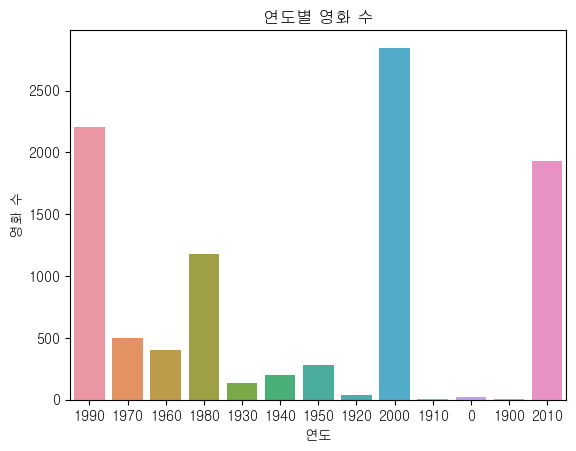

In [13]:
sns.countplot(x = 'year_term', data= movie_df)
plt.title("연도별 영화 수")
plt.xlabel("연도")
plt.ylabel("영화 수")
plt.show()

연도별 영화 수의 그래프를 확인해보면 확실히 점점 영화의 수는 많아지고 있음을 알 수 있고 특히 1980년대 이후부터 급증함을 확인할 수 있다. 그리고 해당 그래프에서 0이 의미하는 것은 실제로 title column값에서 연도가 나오지 않은 영화들이 존재했기 때문에 이를 0으로 따로 분류해주었다.

## EDA (2)

또한 같은 movie 데이터의 genre 부분을 살펴보면 해당 영화에 대한 다양한 장르들이 나타나있음을 알 수 있다. 이러한 장르에 따라 영화의 분포가 어떻게 이루어져 있는지 시각화해보도록 한다.

In [14]:
# 장르들을 담을 딕셔너리
unique_genre_dict = {}

# 영화의 수만큼 반복된다.
for row in movie_df['genres'] : 
    # | 를 기준으로 문자열을 잘라준다.
    parsed_genre = row.split("|")
    
    # 장르의 수만큼 반복한다.
    for genre_name in parsed_genre : 
        # 현재 장르의 이름으로 저장된 데이터가 없다면
        if (genre_name in unique_genre_dict) == False :
            unique_genre_dict[genre_name] = 1
        else :
            unique_genre_dict[genre_name] = unique_genre_dict[genre_name] + 1
            
unique_genre_dict

{'Adventure': 1263,
 'Animation': 611,
 'Children': 664,
 'Comedy': 3756,
 'Fantasy': 779,
 'Romance': 1596,
 'Drama': 4361,
 'Action': 1828,
 'Crime': 1199,
 'Thriller': 1894,
 'Horror': 978,
 'Mystery': 573,
 'Sci-Fi': 980,
 'War': 382,
 'Musical': 334,
 'Documentary': 440,
 'IMAX': 158,
 'Western': 167,
 'Film-Noir': 87,
 '(no genres listed)': 34}

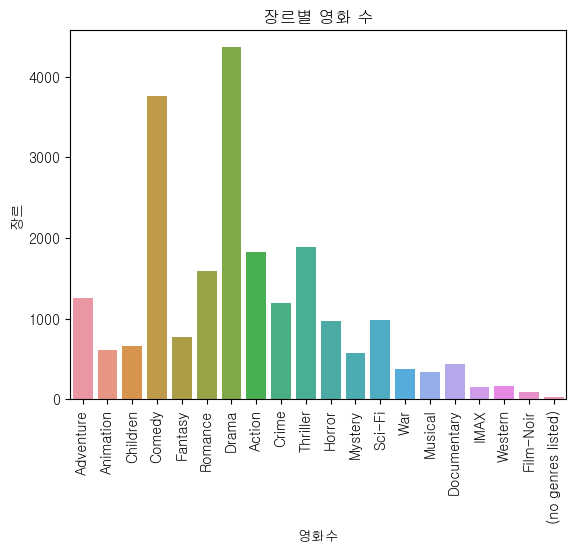

In [15]:
x = list(unique_genre_dict.keys())
y = list(unique_genre_dict.values())
sns.barplot(x = x, y = y)
plt.title('장르별 영화 수')
plt.xlabel("영화수")
plt.xticks(rotation = 90)
plt.ylabel("장르")
plt.show()

장르별 영화 수를 살펴보면 드라마(Drama)와 코미디(Comedy)의 수가 압도적으로 많음을 알 수 있고 그 뒤를 이어 스릴러(Thriller), 액션(Action), 로맨스(Romance) 등이 있다.

## EDA (3)

세번째로는 영화별 평균 평점을 알아보도록 한다. rating 데이터에서 사용자가 영화에 매긴 평점의 정보들이 나타나 있으므로 이를 평균내어 상위 10개의 영화 평점과 정보를 나타내보도록 한다.

In [16]:
movie_rate = rating_df.groupby(['movieId'])['rating'].agg(['count','mean']).sort_values(by = 'mean', ascending=False).reset_index()
top10_movie = movie_rate.loc[(movie_rate['count'] >= 5)].head(10)

In [17]:
top10_movie

,movieId,count,mean
296,6460,5,4.900000
299,177593,8,4.750000
328,31364,5,4.700000
330,2239,6,4.666667
339,4334,5,4.600000
340,1041,11,4.590909
341,106642,7,4.571429
342,3451,11,4.545455
343,1178,12,4.541667
408,1192,5,4.500000


위는 rating 데이터에서 영화의 평균 평점 중 상위 10개의 영화만 추출한 데이터이다.(상대적으로 평점을 매긴 사용자가 적은 즉, 5명보다 적은 영화들은 제외함)

In [18]:
pd.merge(top10_movie, movie_df)

,movieId,count,mean,title,genres,year,year_term
0,6460,5,4.900000,"Trial, The (Procès, Le) (1962)",Drama,1962,1960
1,177593,8,4.750000,"Three Billboards Outside Ebbing, Missouri (2017)",Crime|Drama,2017,2010
2,31364,5,4.700000,Memories of Murder (Salinui chueok) (2003),Crime|Drama|Mystery|Thriller,2003,2000
3,2239,6,4.666667,Swept Away (Travolti da un insolito destino ne...,Comedy|Drama,1975,1970
4,4334,5,4.600000,Yi Yi (2000),Drama,2000,2000
5,1041,11,4.590909,Secrets & Lies (1996),Drama,1996,1990
6,106642,7,4.571429,"Day of the Doctor, The (2013)",Adventure|Drama|Sci-Fi,2013,2010
7,3451,11,4.545455,Guess Who's Coming to Dinner (1967),Drama,1967,1960
8,1178,12,4.541667,Paths of Glory (1957),Drama|War,1957,1950
9,1192,5,4.500000,Paris Is Burning (1990),Documentary,1990,1990


앞서 구한 top10 데이터와 기존의 movie 데이터를 병합하여 상위 10개의 데이터프레임을 만들어보았다.

1. Trial, The (Procès, Le) - 4.9 - 1962
2. Three Billboards Outside Ebbing, Missouri - 4.75 - 2017
3. Memories of Murder - 4.7 - 2003  
...

순으로 영화제목, 평점, 개봉년도를 나타낼 수 있다.

## EDA (4)

In [19]:
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

import re
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

tag_df['tag'] = [re.sub('[^A-Za-z]', ' ', s).lower() for s in tag_df['tag']]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cts08\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
tag_copy = tag_df.copy()
result = []
for sentence in tag_df.tag:
        words = [word for word in word_tokenize(sentence) if word not in stop_words]
        result.append(words)
tag_copy.tag = result

In [21]:
# 정상 메일 토큰 빈도수
vect_tag = CountVectorizer(max_features = 1000, stop_words = 'english')
corpus_tag = sum(tag_copy['tag'], []) 
ct_tag = vect_tag.fit_transform(corpus_tag)

count_tag = pd.DataFrame( {'word' : vect_tag.get_feature_names(),
                           'count' : ct_tag.sum(axis = 0).flat})
count_tag.sort_values('count', ascending = False).head(30) # 상위 10개

,word,count
445,netflix,134
586,queue,131
145,comedy,64
172,dark,47
48,atmospheric,41
214,ending,30
750,space,30
57,bad,28
258,funny,28
934,visually,27


<function matplotlib.pyplot.show(close=None, block=None)>

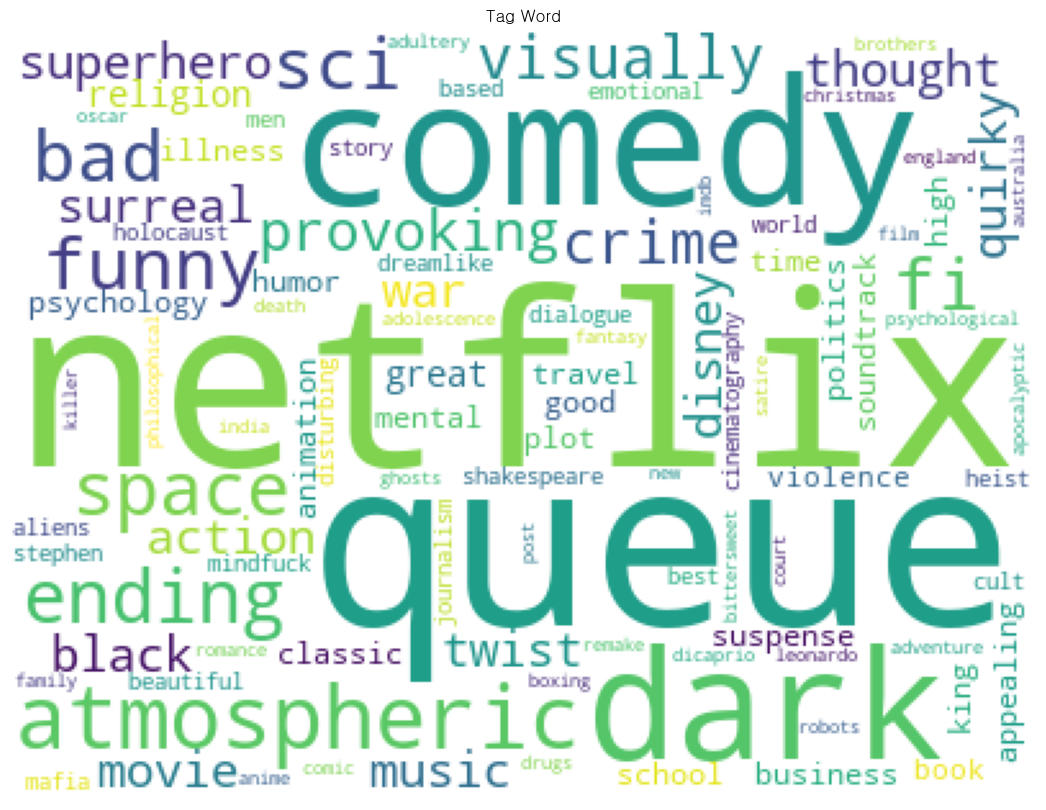

In [22]:
from wordcloud import WordCloud
wc = WordCloud(background_color='white', max_words=100, width = 400, height = 300)

plt.figure(figsize = (15,10))

plt.title('Tag Word')
count_dic = dict(zip(count_tag['word'], count_tag['count']))
cloud = wc.generate_from_frequencies(count_dic)
plt.axis('off')
plt.imshow(cloud)

plt.show

NLP basic에서 실습했던 내용을 가져와서 직접 시각화해보았다. tag 데이터의 영화에 대한 사용자의 tag 문구들을 따로 추출하여 corpus를 만든 후 상위 30개의 단어 count에 따른 wordcloud를 만들었다.  
시각화 자료에서도 보면 알 수 있듯이 netflix의 count가 가장 많음을 확인할 수 있고 그 뒤를 이어 queue, comedy, dark, atmospheric, funny 등이 잘 나타나 있음을 확인할 수 있다.

## EDA (5)

특정 사용자의 ID에 대한 종합적인 정보를 나타내는 함수를 만들도록 하였다. 사용자의 ID를 입력하면 사용자가 본 영화의 ID와 태그, 평점, 제목, 장르가 모두 데이터 프레임을 나오게 하였다.

In [23]:
def user_info(num):
    
    num_df = tag_df.loc[tag_df['userId'] == num]
    dic = {}
    user_list = pd.DataFrame([num]*len(num_df['movieId'].unique()), columns = ['userId'])

    for i in num_df['movieId'].unique():
        dic[i] = num_df.loc[num_df['movieId'] == i]['tag'].values
    
    short_list = pd.concat([user_list, pd.DataFrame(list(dic.items()), columns=['movieId', 'tag'])], axis = 1)

    user_df = pd.merge(short_list, rating_df.loc[rating_df['userId'] == 2],on = ['userId','movieId'], how = 'outer')
    user_df = pd.merge(user_df, movie_df, on = 'movieId')
    user_df = user_df.drop(labels=['timestamp','year','year_term'], axis = 1)
    result = user_df.fillna('[No]')
    return result

In [24]:
user_info(2)

,userId,movieId,tag,rating,title,genres
0,2,60756,"[funny, highly quotable, will ferrell]",5.0,Step Brothers (2008),Comedy
1,2,89774,"[boxing story, mma, tom hardy]",5.0,Warrior (2011),Drama
2,2,106782,"[drugs, leonardo dicaprio, martin scorsese]",5.0,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama
3,2,318,[No],3.0,"Shawshank Redemption, The (1994)",Crime|Drama
4,2,333,[No],4.0,Tommy Boy (1995),Comedy
5,2,1704,[No],4.5,Good Will Hunting (1997),Drama|Romance
6,2,3578,[No],4.0,Gladiator (2000),Action|Adventure|Drama
7,2,6874,[No],4.0,Kill Bill: Vol. 1 (2003),Action|Crime|Thriller
8,2,8798,[No],3.5,Collateral (2004),Action|Crime|Drama|Thriller
9,2,46970,[No],4.0,Talladega Nights: The Ballad of Ricky Bobby (2...,Action|Comedy


# Recommender System Algorithm

In [133]:
from surprise import Reader, Dataset, accuracy
from surprise import KNNBasic, KNNWithMeans, SVD, SVDpp
from surprise.model_selection import train_test_split, GridSearchCV
from surprise.dataset import DatasetAutoFolds

In [86]:
ratings.to_csv('./ratings_noh.csv', index=False, header=False)

In [121]:
# 사용자별 전체영화와 평점을 매긴 영화, 평점을 매기지 않은 영화(추천 대상 영화)에 대한 정보

def get_unseen_surprise(ratings, movies, userId):
     # 특정 userId가 평점을 매긴 모든 영화 리스트
    seen_movies = ratings[ratings['userId']== userId]['movieId'].tolist()
    
    # 모든 영화명을 list 객체로 만듬. 
    total_movies = movies['movieId'].tolist()
      
    # 한줄 for + if문으로 안 본 영화 리스트 생성
    unseen_movies = [ movie for movie in total_movies if movie not in seen_movies]
    
    # 일부 정보 출력
    total_movie_cnt = len(total_movies)
    seen_cnt = len(seen_movies)
    unseen_cnt = len(unseen_movies)
    
    print("사용자 번호: {0}, 전체 영화 수: {1}, 평점 매긴 영화 수: {2}, 추천 대상 영화 수: {3}".format(userId, total_movie_cnt, seen_cnt, unseen_cnt))
    
    return unseen_movies

In [122]:
# 사용자별 추천 top10 영화 제목 및 평점 리스트

def recomm_movie_by_surprise(algo, userId, unseen_movies, top_n=10):
    
    # 아직 보지 않은 영화의 예측 평점: prediction 객체 생성
    predictions = []    
    for movieId in unseen_movies:
        predictions.append(algo.predict(str(userId), str(movieId)))
    
    # 리스트 내의 prediction 객체의 est를 기준으로 내림차순 정렬
    def sortkey_est(pred):
        return pred.est

    predictions.sort(key=sortkey_est, reverse=True) # key에 리스트 내 객체의 정렬 기준을 입력
    
    # 상위 top_n개의 prediction 객체
    top_predictions = predictions[:top_n]
    
    # 영화 아이디, 제목, 예측 평점 출력
    print("사용자 {0}번의 Top-{1} 추천 영화 리스트".format(userId, top_n))
    
    for pred in top_predictions:
        
        movie_id = int(pred.iid)
        movie_title = movies[movies["movieId"] == movie_id]["title"].tolist()
        movie_rating = pred.est
        
        print(f"{movie_title}: {movie_rating:.2f}")

## 1. Memory Based CF

### 1) KNN

In [112]:
reader = Reader(rating_scale=(0.5, 5.0))

data = Dataset.load_from_df(ratings[['userId','movieId','rating']], reader)

train_set, test_set = train_test_split(data, test_size=.25, random_state=0)

In [115]:
algo = KNNBasic(k=40, min_k=1, sim_options={'name': 'msd', 'user_based': True}, random_state=0)
algo.fit(train_set)
pred = algo.test(test_set)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [116]:
accuracy.rmse(pred)

RMSE: 0.9447


0.9446609700557377

In [117]:
reader = Reader(line_format='user item rating timestamp', sep=',', rating_scale=(0.5, 5))
# DatasetAutoFolds 클래스를 ratings_noh.csv 파일 기반으로 생성.
data_folds = DatasetAutoFolds(ratings_file='./ratings_noh.csv', reader=reader)
#전체 데이터를 학습데이터로 생성함.
trainset = data_folds.build_full_trainset()
 
algo = KNNBasic(k=40, min_k=1, sim_options={'name': 'msd', 'user_based': True}, random_state=0)
algo.fit(trainset)

In [123]:
unseen_movies = get_unseen_surprise(ratings, movies, 9)

사용자 번호: 9, 전체 영화 수: 9742, 평점 매긴 영화 수: 46, 추천 대상 영화 수: 9696


In [120]:
recomm_movie_by_surprise(algo, 9, unseen_movies, top_n=10)

사용자 9번의 Top-10 추천 영화 리스트
['Lamerica (1994)']: 5.00
['Awfully Big Adventure, An (1995)']: 5.00
['In the Realm of the Senses (Ai no corrida) (1976)']: 5.00
['What Happened Was... (1994)']: 5.00
['Denise Calls Up (1995)']: 5.00
["It's My Party (1996)"]: 5.00
['Supercop 2 (Project S) (Chao ji ji hua) (1993)']: 5.00
['Lesson Faust (1994)']: 5.00
['Hype! (1996)']: 5.00
['Vampire in Venice (Nosferatu a Venezia) (Nosferatu in Venice) (1986)']: 5.00


### 2) KNN with Means

In [124]:
reader = Reader(rating_scale=(0.5, 5.0))

data = Dataset.load_from_df(ratings[['userId','movieId','rating']], reader)

train_set, test_set = train_test_split(data, test_size=.25, random_state=0)

In [127]:
algo = KNNWithMeans(k=40, min_k=1, sim_options={'name': 'msd', 'user_based': True}, random_state=0)
algo.fit(train_set)
pred = algo.test(test_set)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [128]:
accuracy.rmse(pred)

RMSE: 0.8931


0.8930562776332733

In [130]:
reader = Reader(line_format='user item rating timestamp', sep=',', rating_scale=(0.5, 5))
# DatasetAutoFolds 클래스를 ratings_noh.csv 파일 기반으로 생성.
data_folds = DatasetAutoFolds(ratings_file='./ratings_noh.csv', reader=reader)
#전체 데이터를 학습데이터로 생성함.
trainset = data_folds.build_full_trainset()
 
algo = KNNWithMeans(k=40, min_k=1, sim_options={'name': 'msd', 'user_based': True}, random_state=0)
algo.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [131]:
unseen_movies = get_unseen_surprise(ratings, movies, 9)

사용자 번호: 9, 전체 영화 수: 9742, 평점 매긴 영화 수: 46, 추천 대상 영화 수: 9696


In [132]:
recomm_movie_by_surprise(algo, 9, unseen_movies, top_n=10)

사용자 9번의 Top-10 추천 영화 리스트
['On the Beach (1959)']: 5.00
['The Big Bus (1976)']: 5.00
['Jetée, La (1962)']: 5.00
['Unfaithfully Yours (1948)']: 5.00
['Match Factory Girl, The (Tulitikkutehtaan tyttö) (1990)']: 5.00
['Cat Soup (Nekojiru-so) (2001)']: 5.00
['Strictly Sexual (2008)']: 5.00
['Seve (2014)']: 5.00
['Paterson']: 5.00
['Babes in Toyland (1934)']: 4.96


## 2. Model Based CF

### 1) SVD

In [150]:
reader = Reader(rating_scale=(0.5, 5.0))

data = Dataset.load_from_df(ratings[['userId','movieId','rating']], reader)

train_set, test_set = train_test_split(data, test_size=.25, random_state=0)

In [151]:
algo = SVD(n_factors=50, random_state=0)
algo.fit(train_set)
predictions = algo.test(test_set)

In [152]:
accuracy.rmse(predictions)

RMSE: 0.8682


0.8681952927143516

In [144]:
reader = Reader(line_format='user item rating timestamp', sep=',', rating_scale=(0.5, 5))
# DatasetAutoFolds 클래스를 ratings_noh.csv 파일 기반으로 생성.
data_folds = DatasetAutoFolds(ratings_file='./ratings_noh.csv', reader=reader)
#전체 데이터를 학습데이터로 생성함.
trainset = data_folds.build_full_trainset()
 
algo = SVD(n_epochs=20, n_factors=50, random_state=0)
algo.fit(trainset)

In [145]:
unseen_movies = get_unseen_surprise(ratings, movies, 9)

사용자 번호: 9, 전체 영화 수: 9742, 평점 매긴 영화 수: 46, 추천 대상 영화 수: 9696


In [146]:
recomm_movie_by_surprise(algo, 9, unseen_movies, top_n=10)

사용자 9번의 Top-10 추천 영화 리스트
['Godfather, The (1972)']: 4.31
['Star Wars: Episode IV - A New Hope (1977)']: 4.28
['Pulp Fiction (1994)']: 4.28
['Star Wars: Episode V - The Empire Strikes Back (1980)']: 4.23
['Usual Suspects, The (1995)']: 4.19
['Streetcar Named Desire, A (1951)']: 4.15
['Star Wars: Episode VI - Return of the Jedi (1983)']: 4.12
['Goodfellas (1990)']: 4.11
['Glory (1989)']: 4.08
['Silence of the Lambs, The (1991)']: 4.08


### 2) SVD++

In [147]:
reader = Reader(rating_scale=(0.5, 5.0))

data = Dataset.load_from_df(ratings[['userId','movieId','rating']], reader)

train_set, test_set = train_test_split(data, test_size=.25, random_state=0)

In [148]:
algo = SVDpp(n_factors=50, random_state=0)
algo.fit(train_set)
predictions = algo.test(test_set)

In [149]:
accuracy.rmse(predictions)

RMSE: 0.8652


0.8652382137178714

In [ ]:
reader = Reader(line_format='user item rating timestamp', sep=',', rating_scale=(0.5, 5))
# DatasetAutoFolds 클래스를 ratings_noh.csv 파일 기반으로 생성.
data_folds = DatasetAutoFolds(ratings_file='./ratings_noh.csv', reader=reader)
#전체 데이터를 학습데이터로 생성함.
trainset = data_folds.build_full_trainset()
 
algo = SVDpp(n_epochs=20, n_factors=50, random_state=0)
algo.fit(trainset)

In [140]:
unseen_movies = get_unseen_surprise(ratings, movies, 9)

사용자 번호: 9, 전체 영화 수: 9742, 평점 매긴 영화 수: 46, 추천 대상 영화 수: 9696


In [141]:
recomm_movie_by_surprise(algo, 9, unseen_movies, top_n=10)

사용자 9번의 Top-10 추천 영화 리스트
['Star Wars: Episode IV - A New Hope (1977)']: 4.75
['Pulp Fiction (1994)']: 4.65
['Godfather, The (1972)']: 4.62
['Usual Suspects, The (1995)']: 4.54
['Seven (a.k.a. Se7en) (1995)']: 4.48
['Star Wars: Episode V - The Empire Strikes Back (1980)']: 4.48
['Star Wars: Episode VI - Return of the Jedi (1983)']: 4.39
['Silence of the Lambs, The (1991)']: 4.38
['Lord of the Rings: The Return of the King, The (2003)']: 4.35
['Goodfellas (1990)']: 4.31
